# Data Analysis of Covid 19 Tweets

### Data Analysis of Covid 19 Tweets


#### Task
+ Text Preprocessing
+ Sentiment Analysis
+ Keyword Extraction
+ Entity Extraction
+ etc

#### Dataset
+ Credit (Gpreda)
+ https://github.com/gabrielpreda


## Table of Contents
- [EDA](#EDA)
- [Text Preprocessing](#Text-Cleaning/Preprocessing)
- [Sentiment Analysis](#Sentiment-Analysis)
- [Keyword Extraction](#Keyword-Extraction)

In [1]:
# import packages

# Hide warnings
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer # for sentiment analysis

from tqdm.auto import tqdm

[nltk_data] Error loading vader_lexicon: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


In [2]:
# Load Dataset
df = pd.read_csv("covid19_tweets.csv")

In [3]:
# Preview
df.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False


In [4]:
df.shape

(179108, 13)

In [5]:
df = df.iloc[:10000, :]
df.shape

(10000, 13)

In [6]:
# Check Columns
df.columns

Index(['user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'text', 'hashtags', 'source', 'is_retweet'],
      dtype='object')

In [7]:
# Datatype
df.dtypes

user_name           object
user_location       object
user_description    object
user_created        object
user_followers       int64
user_friends         int64
user_favourites      int64
user_verified         bool
date                object
text                object
hashtags            object
source              object
is_retweet            bool
dtype: object

## EDA

*********** Value counts of user_name ************
Coronavirus Updates    51
covidnews.ch           36
GlobalPandemic.NET     30
Integral Overview      28
Outbreak Science       27
                       ..
Ali Shahed 🇺🇸🇫🇮🏴        1
mandiewelch             1
Cotswold flyers         1
TheRealMeganKelley      1
Mayank Patel            1
Name: user_name, Length: 7260, dtype: int64



*********** Top 20 counts of user_name ***********
Coronavirus Updates            51
covidnews.ch                   36
GlobalPandemic.NET             30
Integral Overview              28
Outbreak Science               27
The Coronavirus Gazette        24
ANI                            24
OTV                            24
Blood Donors India             24
The AssarV10 Team™©            23
APO Group English              22
Novel Coronavirus - Covid19    22
Angsuman's Server              21
Business Standard              20
NEWS9                          19
The Pioneer                    19
Deccan Herald        

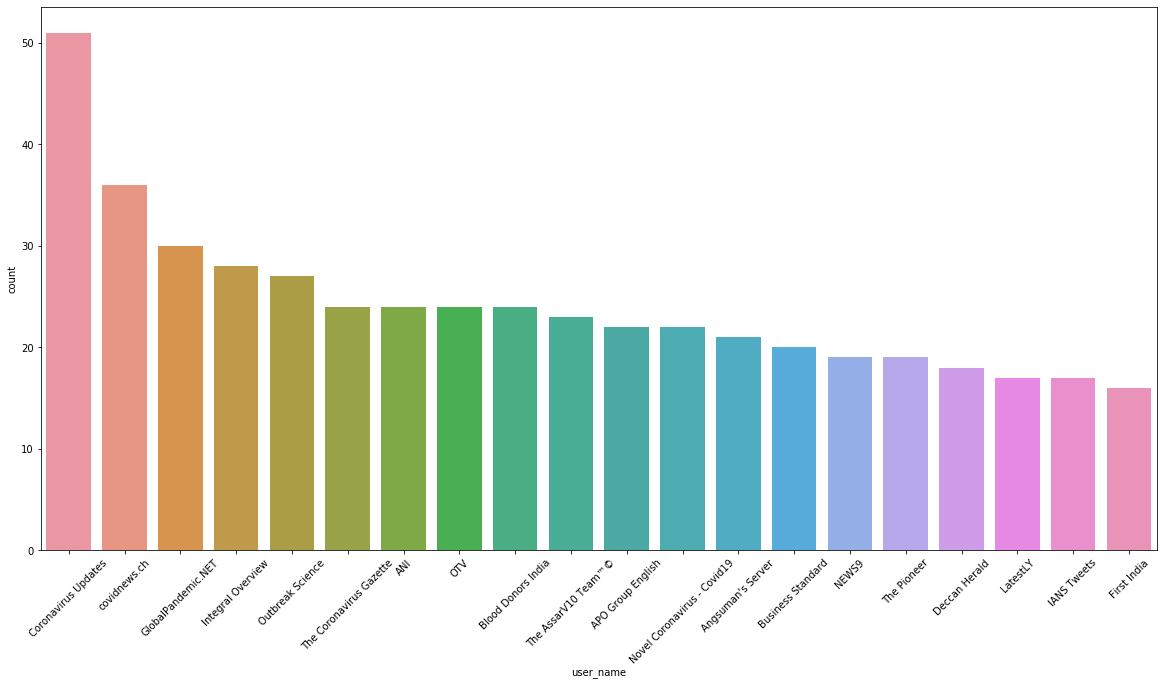

In [8]:
def plot_counts(col, df=df):
    print(" Value counts of {} ".format(col).center(50,"*"))
    print(df[col].value_counts())
    print("\n\n")
    if df[col].nunique(dropna=True)>=20:
        limit=20
    else:
        limit=df[col].nunique(dropna=True)
    if limit>=20:
        print(" Top 20 counts of {} ".format(col).center(50, "*"))
        print(df[col].value_counts()[:20])
        print("\n\n")

    # Plot the top value_counts
    plt.figure(figsize=(20,10))
    plot_df = df[col].value_counts()[:limit].reset_index()
    
    sns.barplot(x='index',y=col,data=plot_df)
    plt.xticks(rotation=45)
    plt.xlabel(col)
    plt.ylabel('count')
    plt.show()
    
    
#     plt.figure(figsize=(20,10))
#     df[col].value_counts()[:limit].plot(kind='bar')
#     plt.xticks(rotation=45)
#     plt.show()
    #print("*"*100)
    
plot_counts('user_name')

In [9]:
col = 'user_name'
plot_df = df[col].value_counts().reset_index()
plot_df

,index,user_name
0,Coronavirus Updates,51
1,covidnews.ch,36
2,GlobalPandemic.NET,30
3,Integral Overview,28
4,Outbreak Science,27
...,...,...
7255,Ali Shahed 🇺🇸🇫🇮🏴,1
7256,mandiewelch,1
7257,Cotswold flyers,1
7258,TheRealMeganKelley,1


*********** Value counts of user_name ************
Coronavirus Updates    51
covidnews.ch           36
GlobalPandemic.NET     30
Integral Overview      28
Outbreak Science       27
                       ..
Ali Shahed 🇺🇸🇫🇮🏴        1
mandiewelch             1
Cotswold flyers         1
TheRealMeganKelley      1
Mayank Patel            1
Name: user_name, Length: 7260, dtype: int64



*********** Top 20 counts of user_name ***********
Coronavirus Updates            51
covidnews.ch                   36
GlobalPandemic.NET             30
Integral Overview              28
Outbreak Science               27
The Coronavirus Gazette        24
ANI                            24
OTV                            24
Blood Donors India             24
The AssarV10 Team™©            23
APO Group English              22
Novel Coronavirus - Covid19    22
Angsuman's Server              21
Business Standard              20
NEWS9                          19
The Pioneer                    19
Deccan Herald        

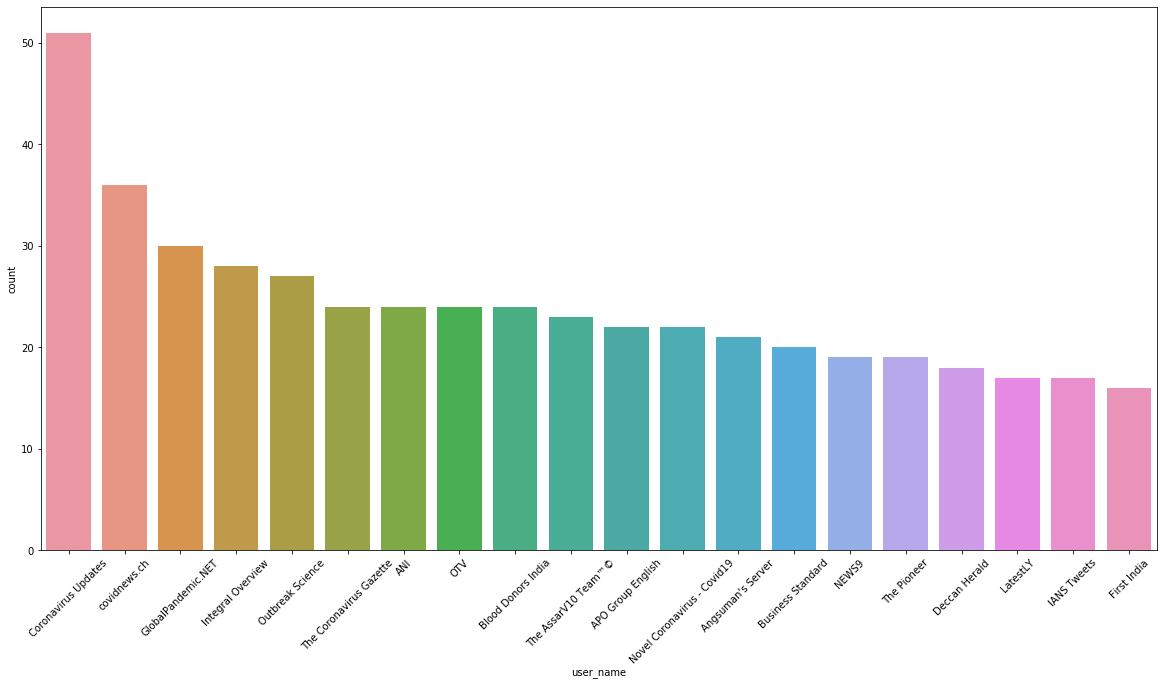

In [10]:
plot_counts('user_name')

********* Value counts of user_location **********
India                    318
London, England          135
New Delhi, India         122
United Kingdom           110
United States            108
                        ... 
Melbourne, Australia       1
Mr. Peeble's Pet Shop      1
noida                      1
Alaska                     1
神奈川県横浜市大倉山                 1
Name: user_location, Length: 3138, dtype: int64



********* Top 20 counts of user_location *********
India                         318
London, England               135
New Delhi, India              122
United Kingdom                110
United States                 108
London                        107
Mumbai, India                 103
Lagos, Nigeria                 71
UK                             67
Nigeria                        61
South Africa                   60
New Delhi                      58
Johannesburg, South Africa     54
Bhubaneshwar, India            46
Worldwide                      45
California, USA   

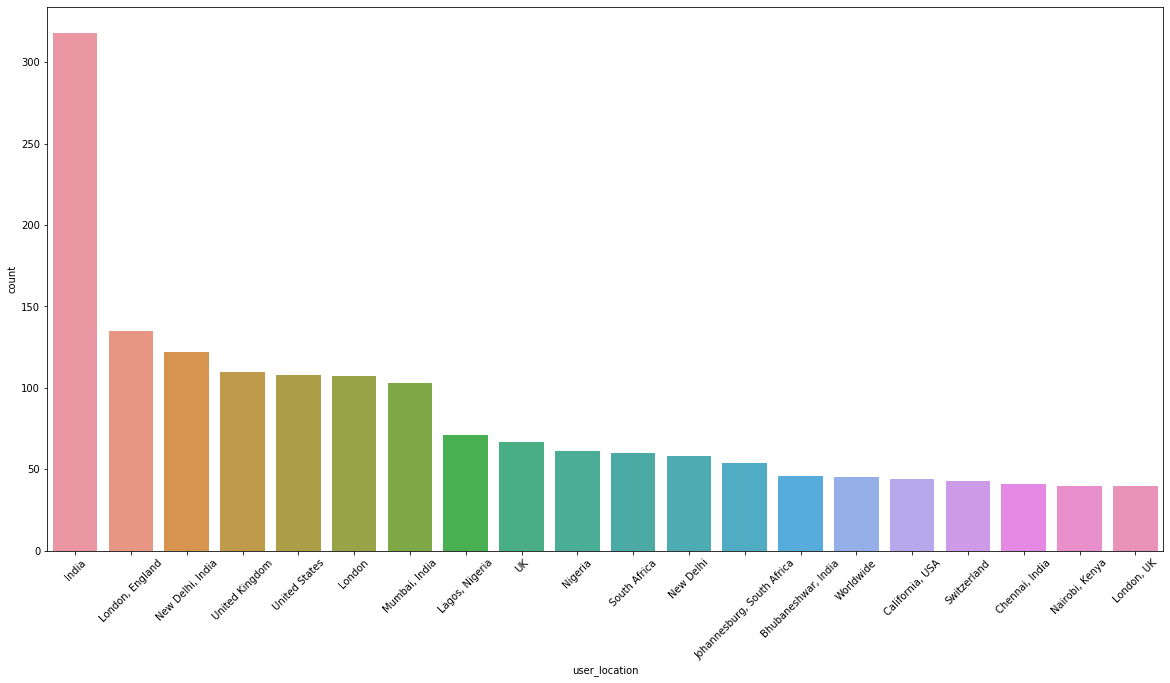

In [11]:
plot_counts('user_location')

********* Value counts of user_verified **********
False    8623
True     1377
Name: user_verified, dtype: int64





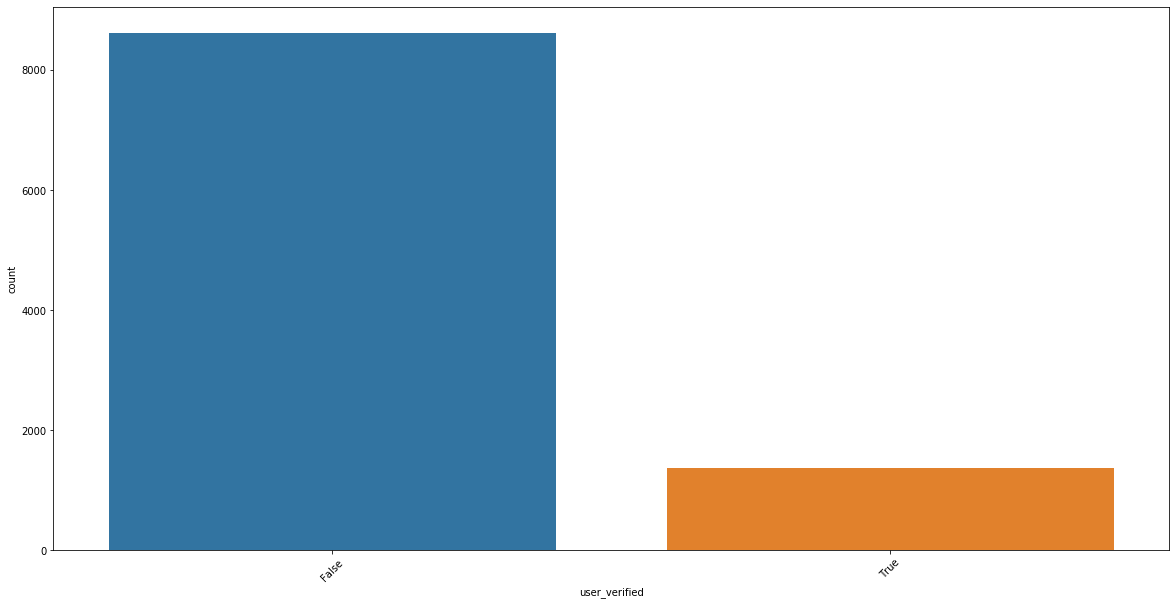

In [12]:
plot_counts('user_verified')

In [13]:
# Source/ Value Count/Distribution of the Sources
df['source'].value_counts()

Twitter Web App         2797
Twitter for Android     2581
Twitter for iPhone      1921
TweetDeck                551
Hootsuite Inc.           310
                        ... 
SnapStream TV Search       1
Sked Social                1
TrackerCV                  1
DataScienceInfo            1
Mention                    1
Name: source, Length: 198, dtype: int64

In [14]:
# Plot the top value_counts
df['source'].value_counts()[:20]

Twitter Web App         2797
Twitter for Android     2581
Twitter for iPhone      1921
TweetDeck                551
Hootsuite Inc.           310
Twitter for iPad         241
IFTTT                    141
Buffer                   113
Instagram                 92
Sprout Social             62
COVID19-Updates           51
dlvr.it                   48
Twitter Media Studio      39
LinkedIn                  38
FS Poster                 36
Fabrik.fm                 34
WordPress.com             31
Paper.li                  31
GlobalPandemic.NET        30
preprint-alert            27
Name: source, dtype: int64

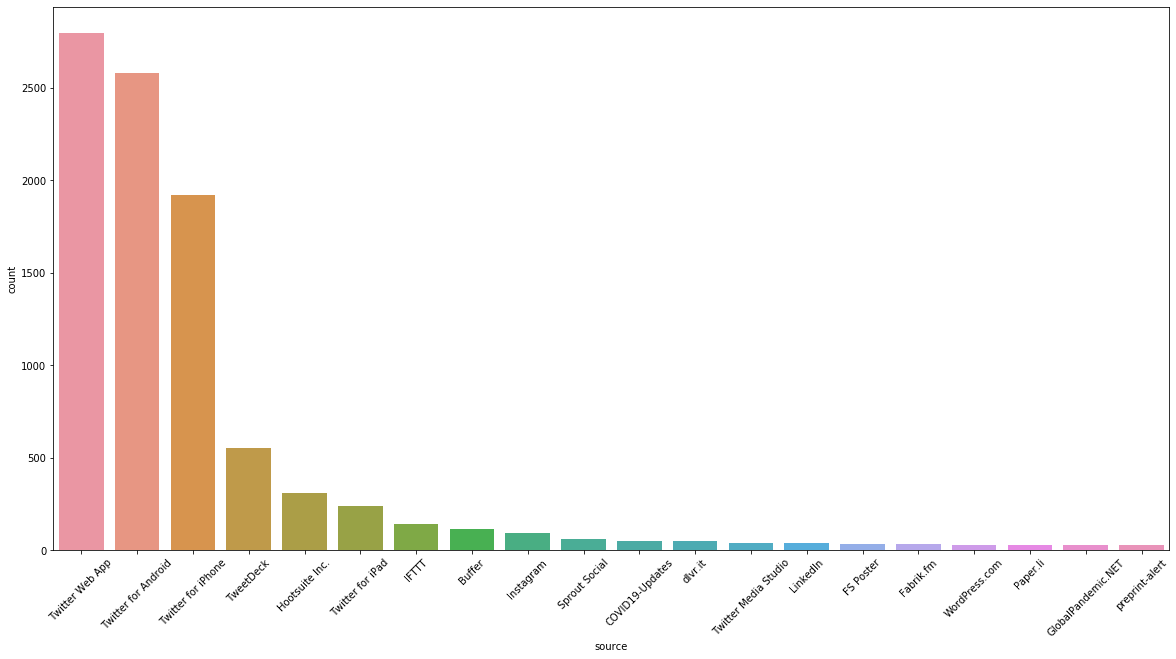

In [15]:
# Plot the top value_counts
plt.figure(figsize=(20,10))
plot_df = df['source'].value_counts()[:20].reset_index()
sns.barplot(x='index', y='source', data=plot_df)
plt.xticks(rotation=45)
plt.xlabel('source')
plt.ylabel('count')
plt.show()

### Text Cleaning/Preprocessing
+ remove mentions/userhandles
+ remove hashtags
+ urls
+ emojis
+ special char

In [16]:
# random tweet
df['text'].iloc[2]

'@diane3443 @wdunlap @realDonaldTrump Trump never once claimed #COVID19 was a hoax. We all claim that this effort to… https://t.co/Jkk8vHWHb3'

In [17]:
# remove hashtags
df['clean_tweet'] = df['text'].apply(lambda x: re.sub(r"#\S+", " ", x))

In [18]:
df[['text','clean_tweet']]

,text,clean_tweet
0,If I smelled the scent of hand sanitizers toda...,If I smelled the scent of hand sanitizers toda...
1,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,Hey @Yankees @YankeesPR and @MLB - wouldn't it...
2,@diane3443 @wdunlap @realDonaldTrump Trump nev...,@diane3443 @wdunlap @realDonaldTrump Trump nev...
3,@brookbanktv The one gift #COVID19 has give me...,@brookbanktv The one gift has give me is an ...
4,25 July : Media Bulletin on Novel #CoronaVirus...,25 July : Media Bulletin on Novel \r\n@kan...
...,...,...
9995,#ICYMI: New @wallabies coach Dave Rennie will ...,New @wallabies coach Dave Rennie will have a...
9996,So we are touching 1 L #COVID19 cases in just ...,So we are touching 1 L cases in just two days.
9997,Which entity do I submit a word spelling chang...,Which entity do I submit a word spelling chang...
9998,করোনায় চোখের যত্নে করনীয়\r\nFACEBOOK LINK:ht...,করোনায় চোখের যত্নে করনীয়\r\nFACEBOOK LINK:ht...


In [19]:
# remove user handles
df['clean_tweet'] = df['clean_tweet'].apply(lambda x: re.sub(r"@\S+", " ", x))

In [20]:
df[['text','clean_tweet']]

,text,clean_tweet
0,If I smelled the scent of hand sanitizers toda...,If I smelled the scent of hand sanitizers toda...
1,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,Hey and - wouldn't it have made more sen...
2,@diane3443 @wdunlap @realDonaldTrump Trump nev...,Trump never once claimed was a hoax. W...
3,@brookbanktv The one gift #COVID19 has give me...,The one gift has give me is an appreciatio...
4,25 July : Media Bulletin on Novel #CoronaVirus...,25 July : Media Bulletin on Novel \r\n ...
...,...,...
9995,#ICYMI: New @wallabies coach Dave Rennie will ...,New coach Dave Rennie will have a few toug...
9996,So we are touching 1 L #COVID19 cases in just ...,So we are touching 1 L cases in just two days.
9997,Which entity do I submit a word spelling chang...,Which entity do I submit a word spelling chang...
9998,করোনায় চোখের যত্নে করনীয়\r\nFACEBOOK LINK:ht...,করোনায় চোখের যত্নে করনীয়\r\nFACEBOOK LINK:ht...


In [21]:
df['clean_tweet'].iloc[10]

'49K+ Covid19 cases still no response from \r\n      cancel the compartment exa… https://t.co/kV2ZKmumu1'

In [22]:
# remove multiple white spaces
df['clean_tweet'] = df['clean_tweet'].apply(lambda x: re.sub(r'\s{2,}', ' ', x))

In [23]:
df['clean_tweet'].iloc[10]

'49K+ Covid19 cases still no response from cancel the compartment exa… https://t.co/kV2ZKmumu1'

In [24]:
#https://www.sitepoint.com/demystifying-regex-with-practical-examples/
URL_PATTERN = re.compile(r"(http|https|ftp):[\/]{2}([a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,4})(:[0-9]+)?\/?([a-zA-Z0-9\-\._\?\,\'\/\\\+&amp;%\$#\=~]*)")

In [25]:
# remove urls
df['clean_tweet'] = df['clean_tweet'].apply(lambda x: re.sub(URL_PATTERN, '', x))

In [26]:
df['clean_tweet'].iloc[10]

'49K+ Covid19 cases still no response from cancel the compartment exa… '

In [27]:
# Cleaning Text: Punctuations
df['clean_tweet'] = df['clean_tweet'].apply(lambda x: re.sub(r"""[!"&',-.;:?_`$%*()]""", '', x))

In [28]:
df[['text','clean_tweet']]

,text,clean_tweet
0,If I smelled the scent of hand sanitizers toda...,If I smelled the scent of hand sanitizers toda...
1,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,Hey and wouldnt it have made more sense to ha...
2,@diane3443 @wdunlap @realDonaldTrump Trump nev...,Trump never once claimed was a hoax We all cl...
3,@brookbanktv The one gift #COVID19 has give me...,The one gift has give me is an appreciation f...
4,25 July : Media Bulletin on Novel #CoronaVirus...,25 July Media Bulletin on Novel
...,...,...
9995,#ICYMI: New @wallabies coach Dave Rennie will ...,New coach Dave Rennie will have a few tough d...
9996,So we are touching 1 L #COVID19 cases in just ...,So we are touching 1 L cases in just two days
9997,Which entity do I submit a word spelling chang...,Which entity do I submit a word spelling chang...
9998,করোনায় চোখের যত্নে করনীয়\r\nFACEBOOK LINK:ht...,করোনায় চোখের যত্নে করনীয় FACEBOOK LINK YOUTU...


### Sentiment Analysis

In [29]:
def get_sentiment(text):
    blob = TextBlob(text)
    sentiment_polarity = blob.sentiment.polarity
    sentiment_subjectivity = blob.sentiment.subjectivity
    if sentiment_polarity > 0:
        sentiment_label = 'Positive'
    elif sentiment_polarity < 0:
        sentiment_label = 'Negative'
    else:
        sentiment_label = 'Neutral'
    result = {'polarity':sentiment_polarity,
              'subjectivity':sentiment_subjectivity,
              'sentiment':sentiment_label}
    return result

In [30]:
def get_sentiment(text):
    sia = SentimentIntensityAnalyzer()
    polarity = sia.polarity_scores(text)
    if polarity['compound'] >= 0.05:
        sentiment = 'Positive'
    elif polarity['compound'] <= -0.05:
        sentiment = 'Negative'
    else:
        sentiment = 'Neutral'
    polarity['sentiment'] = sentiment
    return polarity

In [31]:
# Text
ex1 = df['clean_tweet'].iloc[0]

In [32]:
get_sentiment(ex1)

{'neg': 0.0,
 'neu': 0.856,
 'pos': 0.144,
 'compound': 0.4939,
 'sentiment': 'Positive'}

In [33]:
tqdm.pandas()
df['sentiment_results'] = df['clean_tweet'].progress_apply(get_sentiment)

In [34]:
df['sentiment_results']

0       {'neg': 0.0, 'neu': 0.856, 'pos': 0.144, 'comp...
1       {'neg': 0.071, 'neu': 0.812, 'pos': 0.117, 'co...
2       {'neg': 0.149, 'neu': 0.851, 'pos': 0.0, 'comp...
3       {'neg': 0.0, 'neu': 0.721, 'pos': 0.279, 'comp...
4       {'neg': 0.0, 'neu': 0.685, 'pos': 0.315, 'comp...
                              ...                        
9995    {'neg': 0.081, 'neu': 0.919, 'pos': 0.0, 'comp...
9996    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
9997    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
9998    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
9999    {'neg': 0.308, 'neu': 0.514, 'pos': 0.178, 'co...
Name: sentiment_results, Length: 10000, dtype: object

In [35]:
df['sentiment_results'].iloc[0]

{'neg': 0.0,
 'neu': 0.856,
 'pos': 0.144,
 'compound': 0.4939,
 'sentiment': 'Positive'}

In [36]:
pd.json_normalize(df['sentiment_results'].iloc[0])

,neg,neu,pos,compound,sentiment
0,0.0,0.856,0.144,0.4939,Positive


In [37]:
df = df.join(pd.json_normalize(df['sentiment_results']))

In [38]:
df.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,clean_tweet,sentiment_results,neg,neu,pos,compound,sentiment
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False,If I smelled the scent of hand sanitizers toda...,"{'neg': 0.0, 'neu': 0.856, 'pos': 0.144, 'comp...",0.000,0.856,0.144,0.4939,Positive
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False,Hey and wouldnt it have made more sense to ha...,"{'neg': 0.071, 'neu': 0.812, 'pos': 0.117, 'co...",0.071,0.812,0.117,0.2263,Positive
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False,Trump never once claimed was a hoax We all cl...,"{'neg': 0.149, 'neu': 0.851, 'pos': 0.0, 'comp...",0.149,0.851,0.000,-0.2732,Negative
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False,The one gift has give me is an appreciation f...,"{'neg': 0.0, 'neu': 0.721, 'pos': 0.279, 'comp...",0.000,0.721,0.279,0.7351,Positive
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False,25 July Media Bulletin on Novel,"{'neg': 0.0, 'neu': 0.685, 'pos': 0.315, 'comp...",0.000,0.685,0.315,0.3182,Positive


In [39]:
df['sentiment'].value_counts()

Positive    3996
Neutral     3561
Negative    2443
Name: sentiment, dtype: int64

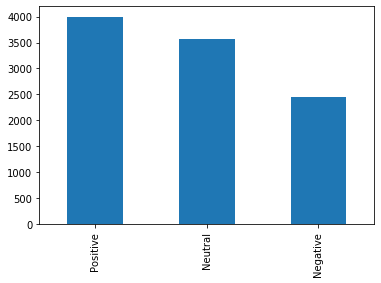

In [40]:
df['sentiment'].value_counts().plot(kind='bar')

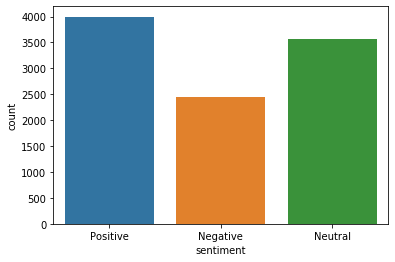

In [41]:
# Plot with seaborn
sns.countplot(df['sentiment'])

### Keyword Extraction
+ For Positive and Negative Sentiment
+ General

In [42]:
positive_tweet = df[df['sentiment'] == 'Positive']['clean_tweet']

In [43]:
neutral_tweet = df[df['sentiment'] == 'Neutral']['clean_tweet']
negative_tweet = df[df['sentiment'] == 'Negative']['clean_tweet']

In [44]:
positive_tweet

0       If I smelled the scent of hand sanitizers toda...
1       Hey and  wouldnt it have made more sense to ha...
3        The one gift has give me is an appreciation f...
4                       25 July  Media Bulletin on Novel 
8               Praying for good health and recovery of  
                              ...                        
9979    Dear Mr Preseident HE Plz take serious action ...
9981    1 NJ teen house party of 1519 yr olds on July ...
9983    Earlier this month after three months of closu...
9985    Cheers to for showing the some love and giving...
9992    This is way the world should be When businesse...
Name: clean_tweet, Length: 3996, dtype: object

In [45]:
STOPWORDS = ['a', 'about', 'above', 'across', 'after', 'afterwards', 'again', 'against', 'ain', 'all', 'almost', 'alone', 'along', 'already', 'also', 'although', 'always', 'am', 'among', 'amongst', 'amount', 'amp', 'an', 'and', 'another', 'any', 'anyhow', 'anyone', 'anything', 'anyway', 'anywhere', 'are', 'aren', "aren't", 'around', 'as', 'at', 'back', 'be', 'became', 'because', 'become', 'becomes', 'becoming', 'been', 'before', 'beforehand', 'behind', 'being', 'below', 'beside', 'besides', 'between', 'beyond', 'both', 'bottom', 'but', 'by', 'ca', 'call', 'can', 'cannot', 'could', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'done', 'down', 'due', 'during', 'each', 'eight', 'either', 'eleven', 'else', 'elsewhere', 'empty', 'enough', 'even', 'ever', 'every', 'everyone', 'everything', 'everywhere', 'except', 'few', 'fifteen', 'fifty', 'first', 'five', 'for', 'former', 'formerly', 'forty', 'four', 'from', 'front', 'full', 'further', 'get', 'give', 'go', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', 'hence', 'her', 'here', 'hereafter', 'hereby', 'herein', 'hereupon', 'hers', 'herself', 'him', 'himself', 'his', 'how', 'however', 'hundred', 'i', 'if', 'in', 'indeed', 'into', 'is', 'isn', "isn't", 'it', "it's", 'its', 'itself', 'just', 'keep', 'last', 'latter', 'latterly', 'least', 'less', 'll', 'm', 'ma', 'made', 'make', 'many', 'may', 'me', 'meanwhile', 'might', 'mightn', "mightn't", 'mine', 'more', 'moreover', 'most', 'mostly', 'move', 'much', 'must', 'mustn', "mustn't", 'my', 'myself', 'name', 'namely', 'needn', "needn't", 'neither', 'never', 'nevertheless', 'next', 'nine', 'no', 'nobody', 'none', 'noone', 'nor', 'not', 'nothing', 'now', 'nowhere', 'o', 'of', 'off', 'often', 'on', 'once', 'one', 'only', 'onto', 'or', 'other', 'others', 'otherwise', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 'part', 'per', 'perhaps', 'please', 'put', 'quite', 'rather', 're', 'really', 'regarding', 's', 'same', 'say', 'see', 'seem', 'seemed', 'seeming', 'seems', 'serious', 'several', 'shan', "shan't", 'she', "she's", 'should', "should've", 'shouldn', "shouldn't", 'show', 'side', 'since', 'six', 'sixty', 'so', 'some', 'somehow', 'someone', 'something', 'sometime', 'sometimes', 'somewhere', 'still', 'such', 't', 'take', 'ten', 'than', 'that', "that'll", 'the', 'their', 'theirs', 'them', 'themselves', 'then', 'thence', 'there', 'thereafter', 'thereby', 'therefore', 'therein', 'thereupon', 'these', 'they', 'third', 'this', 'those', 'though', 'three', 'through', 'throughout', 'thru', 'thus', 'to', 'together', 'too', 'top', 'toward', 'towards', 'twelve', 'twenty', 'two', 'under', 'unless', 'until', 'up', 'upon', 'us', 'used', 'using', 'various', 've', 'very', 'via', 'was', 'wasn', "wasn't", 'we', 'well', 'were', 'weren', "weren't", 'what', 'whatever', 'when', 'whence', 'whenever', 'where', 'whereafter', 'whereas', 'whereby', 'wherein', 'whereupon', 'wherever', 'whether', 'which', 'while', 'whither', 'who', 'whoever', 'whole', 'whom', 'whose', 'why', 'will', 'with', 'within', 'without', 'won', "won't", 'would', 'wouldn', "wouldn't", 'y', 'yet', 'you', "you'd", "you'll", "you're", "you've", 'your', 'yours', 'yourself', 'yourselves']

def remove_stopwords(text):
    result = [word for word in text.split() if word.lower() not in STOPWORDS]
    return " ".join(result)

In [46]:
# Remove Stopwords and Convert to Tokens
positive_tweet_list = positive_tweet.apply(remove_stopwords).tolist()

In [47]:
negative_tweet_list = negative_tweet.apply(remove_stopwords).tolist()
neutral_tweet_list = neutral_tweet.apply(remove_stopwords).tolist()

In [48]:
positive_tweet_list 

['smelled scent hand sanitizers today past think intoxicated that…',
 'Hey wouldnt sense players pay respects A…',
 'gift appreciation simple things me…',
 '25 July Media Bulletin Novel',
 'Praying good health recovery',
 'POPE GOD Prophet Sadhu Sundar Selvaraj Watch',
 '👋🏻 — safe safe commit ensure…',
 'Lets protect real numbers climbing fast Continent Lets n…',
 'COVID Update infection rate Florida following natural curve experts predicted initial cu…',
 'Good Patriots Volunteer Election Judge Polls open without…',
 'comprehensive review Analysis key ways WASH help reduce transmission…',
 'crosses 2 lakh mark 150055 ppp recovered far positive today 6988/total…',
 'Actor father MrGKReddy tested positive 15/20 days s…',
 'safe place visit guests said hotel meticulous applying hand sanitation als…',
 'Actionables healthy recovery',
 'understood hadnt missed meeting In…',
 'Volume 🔊',
 'Venezuelas Economy/Budget tied Oil like Louisianas Funny rightwing example of…',
 'Testing 10 lakh pop

In [49]:
# Tokenization
for line in positive_tweet_list:
#     print(line)
    for token in line.split():
        print(token)

smelled
scent
hand
sanitizers
today
past
think
intoxicated
that…
Hey
wouldnt
sense
players
pay
respects
A…
gift
appreciation
simple
things
me…
25
July
Media
Bulletin
Novel
Praying
good
health
recovery
POPE
GOD
Prophet
Sadhu
Sundar
Selvaraj
Watch
👋🏻
—
safe
safe
commit
ensure…
Lets
protect
real
numbers
climbing
fast
Continent
Lets
n…
COVID
Update
infection
rate
Florida
following
natural
curve
experts
predicted
initial
cu…
Good
Patriots
Volunteer
Election
Judge
Polls
open
without…
comprehensive
review
Analysis
key
ways
WASH
help
reduce
transmission…
crosses
2
lakh
mark
150055
ppp
recovered
far
positive
today
6988/total…
Actor
father
MrGKReddy
tested
positive
15/20
days
s…
safe
place
visit
guests
said
hotel
meticulous
applying
hand
sanitation
als…
Actionables
healthy
recovery
understood
hadnt
missed
meeting
In…
Volume
🔊
Venezuelas
Economy/Budget
tied
Oil
like
Louisianas
Funny
rightwing
example
of…
Testing
10
lakh
population
Jammu
Kashmir
reached
44744
12742
country
Recovery
r…
4249584
case

COVID19
Ukraine
Join
30
July
webinar
deploy
response
preserving
the…
New
preprint
SARSCoV2
serosurvey
Health
Care
Workers
Veneto
Region
mask
butterfly
symbolize
hope
dark
time
Zlatan
Ibrahimovic
like
undertaker
football
Man
total
beast
pitch
Fake
positive
tests
Win
Big
Trump
Reduces
Drug
costs
Seniors
benefit
huge
Medicare
people
costs
down…
Im
worried
Ive
exposed
elderly
grandmother
father
whos
lifelong
h…
published
June
1
Comprehensive
review
existing
evidence
supports
physical
distanci…
🔔Did
miss
webinar
share
new
growth
opportunities
connected
the…
New
preprint
Concerns
quality
life
access
care
productivity
general
population
during…
Colly
Sweetness
love
daddy
Official
Video
African
story
written
Colly
Sweetness
Read
article
training
safety
healthcare
professionals
posted
monthly
news…
Positive
cases
increased
safe
today
Friends
Let’s
protect
getting
rid
contract
cleaners
important
theyve
joke
real
numbers
allowed
reveal
stunning
example
need
real
leadership
senior
levels
governmen

tested
positive
15/20
days
s…
beautiful
chaos
midsummer
garden
metaphor
life
moment
things
gratef…
community
best
country
love
country
Covid
19
helping
team
Love
Stay
safe
Spe…
encourage
people
gone
away
week
singing…
Grateful
announce
partnering
fight
black
community…
Dont
forget
openly
admits
intentionally
misconstrue
numbers
right
on…
held
online
launch
New
lots
new
features
youll
definitely
need
check
it…
pay
joke
perfumes
perceive
right
way
puts
stress
lives
self
care
extremely
important
think…
tests
positive
total
2768
profit
jumps
36
stake
sales
bank
makes
Rs
5550
crore
provisions
delegation
led
state
party
chief
Leader
Opposition
arri…
COVID19
case
data
tally
July
25
Total
confirmed
cases
78000
recoveries
hit
25000
price
gouging
best
Zovirax
store
shelf
£485
demanded
automatically
offere…
save
livelihoods
starting
international
flights
mandatory
test
t…
trust
lives
childrens
lives
Trump
insane
Good
job
lot
little
man
silver
spoon
mouth
45
deaths
COVID19
young
protect
vuln…
Uh
y

hands
Wear
mask
Stop
s…
MOISTURISER
HAND
SANITIZER
SALE
Enjoy
instant
clean
natural
hand
sanitizer
youre
going
weekend
remember
social
distancing
Best
Proper
way
Wear
Viral
Face
Shield
Federal
Ministry
Health
Lets
inform
Public
ad…
amazed
DriveIn
movies
making
raging
comeback
wonder
people
shoplift
fear
identified…
lifelong
Seinfeldesque
germaphobe
reassuring
resear…
child
catches
brings
home
family
member
family
friend
contracts
wh…
ministry
announced
330
additional
cases
recovery
bringing
total
number
recoveries
105750…
Today
parade
year
taking
opportunity
virtuall…
COVID19
2984
fresh
cases
active
cases
cross
government
needs
step
save
American
businesses
going
spiral
second
Great
Depre…
Thanks
initiatives
fight…
Face
masks
important
pandemic
Read
unprecedented
situation
important
care
loved
ones
Check
f…
advocating
teachers
Youre
comfortable
teachers
returning
school
the…
Awhad
undergoing
treatment
Deenanath
hospital
test
reports
came
positive
said
family
mem…
sharing
stories
coping

consequences
pharmaceutical
industry
webinar…
Exactly
preexisting
condition
good
p…
Active
cases
decreased
873
24
hours
364
hour
Data
MoHFW
outlined
actions
successful
⬇️
transmission
saving
lives
Let’s
use
tools
have…
Wearing
mask
good
preventive
measure
protect
infection
I…
Here’s
it’s
important
infections
long
term
health
ef…
contacted
contact
tracers
phone
text
message
important
follow
advi…
11
patients
admitted
ICU
patients
ventilator
support
BMC
Commissioner
Prem
Chandra
Chaudhary…
PM
reaction
covid19
like
child
getting
new
session
books
got
excited
later
got
bo…
stay
2M
everbody
thats
fine
Try
countries…
manager
Xavi
announced
tested
positive
coronavirus
Okay
want
control
Population
step
Solo
mining
bring
nice
piece
BTC
effective
way
earn
CryptoTab
mining
itself…
Help
slow
spread
identify
risk
cases
sooner
selfreporting
symptoms
daily
y…
nice
trip
fall
Soak
rich
faith
benefit
soul
know
God
expects
guess
des…
denial
great
American
nightmare
⁦
uses
google
mobility
data
establishes

London
hospital
showing
significant
increase
stillbirths
lockdown
Authors
sugges…
Help
slow
spread
identify
risk
cases
sooner
selfreporting
symptoms
daily
y…
design
business
corporate
flyer
postcard
design
24
Hours
Order
…
parents
ask
dont
perfect
needed
kin…
serene
sunset
impromptu
streetside
art
market
unwinding
saturday
afternoon
time
COVID19…
ALERT
FBI
Pledged
Source
Anonymous
Trump
Allies
Aided
Unmasking
Global
Pandemic
News
|…
people
AOC’s
district
playing
politics
w
lives
woman
making
170k
year
couldn’…
national
Eat
Help
scheme
open
places
selling
food
consumption
premises
eg
hot…
Credit
⁦
team
Portobello
great
safe
system
place
restaurants
sign
Eat
Help
scheme
open
places
selling
food
consum…
Hearts
minds
voices
great
way
explore
feelings
free
book
Activities
download…
blessed
sweet
ji
reined
and…
Alkhidmat
Foundation
Khyber
Pakhtunkhwa
Women
Wing
Trust
conducted
antibodies
free
tests
Hayatabad
Children
Acad…
Las
Vegas
Coronavirus
Relief
Task
Force
Partnered
Company
Tied
UAE
In

enjoy
freakshow
Yesterday
10th
wedding
anniversary
took
entire
day
away
work
emails
lovely
kid…
tested
positive
Temperature
checks
gallons
hand
sanitiser
plenty
social
distancing
gyms
England
welcoming
cli…
Appeal
persons
donate
plasma
great
humanitarian
spiritual
serv…
Xavi
tested
positive
Number
patients
falls
10
Yes
10
Help
slow
spread
identify
risk
cases
sooner
selfreporting
symptoms
daily
y…
listening
person
supports
Kanye
president
experience
Knead
Haasendal
Gables
Safety
Thanks
guys
Barcelona
legend
manager
Qatari
AlSadd
Xavi
Hernandez
announced
tested
positive
for…
2803
new
positive
cases
reported
Bihar
taking
total
number
cases
36314
State
Health
Department
Chief
Minister
today
inaugurated
Care
Center
testing
lab
ICYMI
thread
gives
useful
analysis
latest
numbers
National
Day
Reflection
remember
loved
ones
died
think
…
Pulmonary
DECT
angiography
revealed
significant
number
pulmonary
ischemic
a…
🙏😷💀
Comprehensive
townwide
imposed
Municipality
seven
days
star…
look
good
covering


Victoria
today
city
Casey
reaching
149
remember
stay
home
s…
deserve
lots
accolades
remain
favorite
punter
✊
situation😜😜😜
BTW
better
proposition
induction
mean
th…
special
shoutout
instructor
welding
fabrication
Mr
Kyesman
Bigwan
amazing
imp…
MOPH
announced
398
new
COVID19
cases
330
recoveries
active
cases
Qatar
fell
3122
nu…
cm
test
positive
man
blamed
retweet
hustle
donate
Save
life
Fight
Introducing
Hafeles
Stay
Healthy
Compact
FloorStanding
Sanitising
Station
Wipe
Dispenser
B…
bold
journalist
asked
getting
high
numbers
stopped
mass
Help
slow
spread
identify
risk
cases
sooner
selfreporting
symptoms
daily
y…
Pls
sign
petition2help
safer4the
people
shielding
2at
shopping
I…
Lets
help
best
fragrance
completes
dressing
makes
stand
makes
head
turn…
week
I’ve
started
watch
tvshow
I’m
end
season
2
want
David
Palmer…
RBI
signed
necessary
documents
extending
400
million
currency
swap
facility
Sri
Lanka
boost
is…
Friday
545
PM
final
appointment
day
ring
number
Patient
answers
tells
he’s
i…
11

appeale
recovered
persons
donate
plasma
great
humanitarian
service
in…
graphic
design
services
affordable
prices
🥳📢
Kindly
retweet
prospective
client
TL
🤗…
prepared
1
Continuous
double
digit
rising
number
new
cases
2
Decline
SOP
compliance
p…
thrust
healthcare
payers
providers
adaptation
mode
deliver
care
predominantly…
thrust
healthcare
payers
providers
adaptation
mode
deliver
care
predominantly…
thrust
healthcare
payers
providers
adaptation
mode
deliver
care
predominantly…
passion
helping
easy
blessed
do…
Drizzling
disinfectants
Corniche
beach
walkers
restrict
transmission
Awesome
effor…
15
Shirts
Hoodies
Face
Masks
retweet
spread…
Thank
excellent
summary
protocols
reflect
different
point
views
i…
Enjoy
chat
Haydar
founder
talk
considerable
challenges
unjust
sanctions
proven
innovative
in…
hear
parents
importance
family
care
approach
nursery
tran…
Dubai
introduced
teledentistry
services
help
patients
continued
dental
services
pandemic
is…
BJP
States
v/s
Delhi
👇
Total
Positive
Cases
d

pleasantly
surprised
100
people
wear…
139
new
cases
tally
2654
active
cases
1055
toll
rises
38
3
deaths
Health…
Coram
Ambitious
Adoption
launched
new
support
package
adoptive
families
wel…
Madhya
Pradesh
CM
Shivraj
Singh
Chouhan
says
tested
positive
PTI
Register
join
city
Amsterdam
know
drive
rehabiliaion
effect
survivi…
great
FREE
resource
written
Sadie
Hopson
help
cope
uncertain…
notsorosy
hopes
reasons…
bit
brotherly
publicity
study
coled
cardiologist
sister
15
minute…
engineer
blame
gives
soulmate
opportunity
incriminate
sc…
Awesome
track
ashamed
opened
Public
country
increasing
number
new…
Sport
Alert
🇱🇺Sports
Cardiologists
sugestion
Preparticipation
Exam
COVID19
R…
Like
fucking
14
Feb
Chevening
mistress
2
weeks
sort
divorce
the…
care
hmmm
dah
naik
balik
dah
IITKharagpur
develops
novel
rapid
diagnostic
device
costs
Rs400/
👏👏
Help
slow
spread
identify
risk
cases
sooner
selfreporting
symptoms
daily
y…
original
Ritetek
Juice
Extractor
OGTMart
👇
finalizing
corridor
agreement
facilitat

excuse
going
window
Help
slow
spread
identify
risk
cases
sooner
selfreporting
symptoms
daily
y…
Wow
need
listen
life
fair
unfair
Happy
Year
Anniversary
fantastic
hotspot
barblendnl
dear
valypintiuc
jorgepessanha
tonig…
It’s
like
watching
waiting
outcome
experiment
decide
not…
hear
gov
officials
UK
better
early
days
dont
buy
exc…
wrote
78
Gave
Freedom
BellyDance
request
look
condition
Bihar
which…
Yup
elections
🇵🇱
w
dont
pretend
getting
better
584
new
cases
toda…
feel
like
Pandemic
vanish
elections
November
🤔
Weekend
Sale
Save
Extra
15
Orders
Code
JULY15
200
cards
priced
153
Valid
un…
BREAKING🚨
Xavi
Hernandez
tested
positive
Coronavirus
NorthEast
Northeast
sports
centre
keeps
members
moving
motivated
lockdown
CM
tests
positive
//
Cook
elaborate
dishes
like
need
stew
half
day
Hong
Kong
reported
133
new
cases
today
126
local
cases
biggest
number
outbrea…
Parents/Brothers/Sisters
/Aunts
/
Uncles
politicians
looting
money
enslaving
t…
Niagara
Falls
tour
boats
highlight
Canadas
stark
divide


public
health
order
cappin…
tested
positive
𝐊𝐚𝐫𝐦𝐚
𝐡𝐚𝐬
𝐧𝐨
𝐦𝐞𝐧𝐮
𝐘𝐨𝐮
𝐠𝐞𝐭
𝐬𝐞𝐭
𝐬𝐞𝐫𝐯𝐞𝐝
𝐰𝐡𝐚𝐭
𝐲𝐨𝐮
𝐝𝐞𝐬𝐞𝐫𝐯𝐞
Still…
start
1000
Republicans
900
leave
party
TOTAL
FAILURE…
Happy
Saturday
stepping
important
certainly
wear
mask
কিছু
দরকারি
কাজে
বেরোচ্ছি…
Kindly
retweet
clients
timeline
National
coach
admitted
current
circumstances
resulting
ongoing…
year
day
enjoying
visiting
province
China
sb
world
fr…
Droplets
uncovered
cough
travel
12
feet
double
currently
recommended
socialdistanc…
City
Hall
officials
awards
exceed
fighting
doctors
awards
148492
Deaths
WATCH
old
Lie
favored
right…
Gyms
swimming
pools
reopen
England
tourists
welcomed
Wales
Tips
effective
post
Nominate
organization
BEST
INITIATIVES…
unknown
investigation
count
didn’t
jump
today
did…
Michael
Gove
attacking
public
interest
law
group
Tory
cash
friends
like
classic
Jim
Lee
comics
help
pandemic
🙌
😷
📸
emelongr
vows
free
tests
resident
Ajamn
begins
o…
420898
Test
24
Hrs✌️👍
continuously
increasing
testing
scared
Cases
t…
disturbing
news
Hu

true
number
deaths
allow
people
honest
cause
death
Kadirgamam
Legislative
Assembly
MLA
Shri
Jayabal
tested
positive
directed
He…
25
dollar
sign
fee
Free
Join
Lets
gets
200
👇…
Phenomenal
news
feeling
like
Titanic
Lost
job
donated
Retire…
huge
thanks
Monty
Devchand
Laxmi
Cash
Carry
going
extra
mile
shopping
d…
Cases
15746452
+1093
Deaths
639900
+9
Recovered
9054474
+600
Active
Cases
6691978
425
Comp…
Join
experts
unfold
issues
concerns
people
living
highlight
government
pr…
Help
slow
spread
identify
risk
cases
sooner
selfreporting
symptoms
daily
y…
Start
“Why”
+
innovation
=
long
term
sustainable
healthcare
Fostering
right
organ…
Dont
book
Lyinair
mess
dont
refund
clean
refund
youll
get…
incorporated
storylines
great
time…
Good
read
creative
industries
Caribbean
Key
areas
flagged
tend
lean
toward…
100
organic
Umhlonyane/Lengana/Artemisia
250ml
R35
DM
orders
Medicinal
uses
1
Help
treat
cough
c…
love
plantain
🥰😋
Goes
3000
join
millions
Nigerians
Government
meant
provide
enabling
environmen

asymptomatic
individual
lucky
enou…
Neatly
Rx350
sale
Price
25m
08129337456
Location
Pls
check
aim
ensure
womens
voices
heard
🏴󠁧󠁢󠁳󠁣󠁴󠁿
look
new
blog
s…
January
27
wrote
sporadic
article
mysterious
virus
causes
problems
🇨🇳
Chinese
Super
League…
interesting
insights
Hopefully
means
step
closer
finding
long
term
solution…
getting
respect
deserve
excellent
pandemic
response
Yes
Johnson
deliberately
lives
risk
3rd
Feb
2020
knew
d…
updated
guide
include
Coronvirus
section
Download
free
guide
at…
4K
Cycling
cycling
Big
Ben
Join
cycling
tour
VIDEO
📺
Starting
BRAVE
CF
36🇷🇴
strongest
Covid19
policies
safety
precautions
ready
💪🔥…
thread👇also
asks
UK
squandered
gift
month
head
start
asks
“WHY”…
appreciate
great
win
pleasure
the…
IIT
Kharagpur
researchers
claim
developed
novel
technology
rapid
test
Ultrapor…
symptoms
test
report
found
positive
appeal
colleagues
has…
paper
pencil
close
hand
view
broadcast
related
or…
China
actively
tackling
climate
change
implementing
Paris
Agreement
fighting
promoti

Eat
betting
money
don’t
bet
eating
money…
Dear
Breaking
piggy
bank
grade
8
student
businessman
help
repatriate
stranded
amid
the…
IIT
Kharagpur
researchers
claim
developed
novel
technology
rapid
test
Ultraportable
devic…
Madhya
Pradesh
chief
minister
Shivraj
Singh
Chouhan
said
tested
positive
CoronaVirus
Saturda…
AmaCC™
aka
main
products
sale
kodwa
sell
exclusive
handmade
neckpiece
bracel…
Overnight
oats
almond
milk
chia
seeds
flax
seeds
berries
Easy
breakfast
strong
care
health
😊🙌
test
positive
Soon
Mamaji
🟡COVID
RECOVERED
UPDATE
09
Covid19
patients
recover
discharged
hospital
raising
total
number
re…
False
electiona
suspended
posponed
october
2020
the…
inconsistency
mesage
wear
masks
protect
Half…
Chief
Minister
Madhya
Pradesh
tests
positive
tweeted
inform
abo…
support
neighbours
community
need
help
reach
☎️Call
0203
711
012…
Free
decoction
fee
hot
water
centres
ఉచిత
కషాయ
కేంద్రం
వేడి
నీటి
కేంద్రం
opened
Finance
Minister
Harish…
ALERT
Florida
GOP
Congressman
‘Devastated’
Longtime
Sta

test
positive
day
brunch
😋
tradition
years
missed
year
thanks
😒
…
PTINews
139
new
cases
tally
2654
active
cases
1055
toll
rises
38
3
deat…
PTINews
Madhya
Pradesh
CM
Shivraj
Singh
Chouhan
says
tested
positive
offer
selfpaced
COVID19
contact
tracing
course
absolutely
FREE
opportunit…
Funny
cretins
masks
started
piping
theyve
mute
months
streets
f…
isnt
willing
risk
health
child
forcing
other…
Life
perfect
good
opportunity
use
Yes
Thats
infact
are…
Help
slow
spread
identify
risk
cases
sooner
selfreporting
symptoms
daily
y…
Interesting
results
Kings
College
5
minutes
Ive
noticed
4
men
walk
petrol
station
Starbucks
masks
new
rule
working
MP
CM
tests
positive
Day
47
Organic
growth
site
Machine
Learning
A…
industry
impacting
relief
Madhya
Pradesh
Chief
Minister
tested
positive
announced
tweet
Chouhan
is…
🚛🚕🚌
WATCH
look
DTB
classroom
🚌🚕🚛
gt
classroom
course
Tuesday
28th
July
lt
gt
ONLINE…
Positive
cases
reach
421
996
Covid19
cases
continue
rise
rapidly
country
socalled…
Good
point
missed
oppor

ji
MP
CM
tests
positive
currently
quarantine
knowing
F…
ECOSOC
resolution
calls
Task
Force
enhance
support
Member
States
paying
particular
attention…
smart
Check
Health
Status
Smart
⌚️Watch
Today
BLOG
Girls
young
women
era
urgent
action
Read
the…
German
FFP2
N95
CE
approved
masks
German
meltblown
let’s
win
covid
Masafa
Tours
Clients
Masafa
Mara
enjoying
view
2020
Wild
Beast
Migration
Post
Covid
ma…
trust
Enjoy
life
live
happily
makes
happy
🦋🏃🏾‍♂️🚶‍♂️💃🏾🕺🏼🤸‍♂️🏋️‍♂️⛷🏊‍♂️🤽‍♂️🤾‍♂️🛌…
thought
old
town
capital
historic
battle
freedom
hell…
ALERT
Feds
use
tear
gas
try
disperse
rowdy
Portland
protests
Global
Pandemic
News
|
cant
remember
time
agreed
hes
right
suggest
anti…
INCREASE
FAMILY
LOVE
CONNECTION
…
don’t
jump
conclusions
people
face
masks
public
20
population
disa…
we’re
calling
government
sure
people
high
risk
catch
c…
Madhya
Pradesh
CM
Shivraj
Singh
Chouhan
tests
coronavirus
positive
Pradesh
Chief
Minister
assist
Mzimhlope
Killarney
Soweto
electricity
wen…
COVID19
India
Positivity
Rate

staff
test
positive
lock
eased
ways
protecting
f…
hrbartender
7
Things
Include
Welcome
Workplace
Communication
Bartender
HBCUs
create
mask
glove
disposal
units
surrounding
communities
Pezzulo
responsible
case
run
Border
Force
wh…
happy
today
able
eat
plate
rice”
says
8yearold
Naznin
Weve
stepped
food
di…
Chief
Minister
tested
positive
informa…
soon
sir
Active
cases
increased
308
24
hours
128
hour
Data
provider
MoHFW
Let
appreciate
applaud
going
duty
help
sanitary
worke…
Ari
Kaplan
recently
spoke
Joey
Seeber
CEO
cofounder
Level
2
Legal
Solutions
leadership
and…
says
tested
positive
appeal
COVID
warriors
come
forth
donate
plasma
help
save
precious
lives
people
suf…
wear
maskmake
America
great
sane
Biden
Click
link
join
oluo…
Manage
entire
employee
life
cycle
True
Employee
Wellbeing
Platform
Visit
today…
Compared
big
deal
wish
celebrating…
Dont
forget
Face
Mask
Balm
lot
friends
work
contacts
reach
recently
pandemic
T…
196
lives
Lost
July
24
sure
baseball
Updates
updates
information
helpfu

Dam…
cost
testing
reduced
approved
private
laboratories
Govt
Help
slow
spread
identify
risk
cases
sooner
selfreporting
symptoms
daily
y…
Happiness
journey
CM
Madhya
Pradesh
Shri
Shivraj
Singh
Chauhan
ji
tested
positive
Thats
shocking
alarmi…
Chief
Minister
tests
positive
pray
Nigeria
pray
world
pray
sick
Madhya
Pradesh
CM
announced
tested
positive
urge…
Chief
Minister
tested
positive
Madhya
Pradesh
Chief
Minister
Shivraj
Singh
Chouhan
tests
positive
COVID19
positivity
ratio
today
5
cent
situation
satisfactory
prepared
D…
AfDBGroup
relief
millions
refugees
hosts
region
20
million
pro…
AfDBGroup
African
Development
Fund
approves
138
million
response
support
impact
effective
solutions
bskathayat
Cofounder
lbswebsoft…
COPSOffice
institutions
higher
education
contemplate
fall
semester
look
like
theres
concern…
[
Covid19
Handbook]
gtgt
Deal
Pandemic
II
gt
[SHARE
it]…
buzz
B
ministry
recommended
home
ministry
soft
reopening
movie
theatresby
end
A…
Mama
ji
MP
CM
tests
positive
currently
quaran

changing
epidemiology
changing
surveillance
Looking
forward
listen
good
results
⁦
—
University
Miami
working
to…
good
thing
getting
undone
Cases
15738013
+1200
Deaths
639704
+51
Recovered
9044052
+847
Active
Cases
6693961
4253
Co…
Optimal
Allocation
Vaccines
you’re
fucking
joke
Madhya
Pradesh
Chief
Minister
Shivraj
Singh
Chouhan
tests
positive
happens
Chief
minist…
Burning
Man
Oregon
Country
Fair
John
Muir
Trail
“Because
it’s
there”
Buddhist
retreats
…
tests
positive
save
100000
lives
says
Yale
epidemiology
professor
care
live
someonecome
online
meeting
hosted
by…
CM
ShivRaj
Singh
Chouhan
Tested
positive
CM
Shivraj
Singh
Chouhan
tests
positive
Masks
effective
139
clients
exposed
2
hair
stylists
confirmed
COVID19
stylist…
Queening
👑
wish
happiest
blessed
weekend
😊😊
MP
Chief
Minister
Shivraj
Singh
Chouhan
tests
positive
Soon
Mama
Chief
Minister
Shivraj
Singh
Chouhan
tests
positive
Texas
hospital
overwhelmed
letting
coronavirus
win
Im
grateful
Chief
Minister
tests
positive
Chief
Minister


cases
reported
taking
total
number
cases
24…
Buy
Home
Gurugram
help
+919953819977
Web…
Visited
URBAN
HEALTH
CARE
CENTER
ANTI
RapiGEN
test
taken
Hameed
Shah
Complex
Benga…
current
situation
India
21
day
promise
vanquishing
virus
long
went
London
Luton
like
wasn’t
global
pandemic
People
wearing
fa…
Vietnam
high
alert
new
coronavirus
case
emerges
country
months
Reuters
reports…
person
cant
bring
location
hes
currently
Good
morning
AFRICA
Live
life
beautiful
naturally…
Don’t
wanna
wear
mask
public
store
watch
vid
youre
willing
forego
freedom
liberty
fac…
explain
millions
health
care
workers
coopte…
virus
gone
away
Apparently
theyve
forgotten
reasons
schools
closed
protect
c…
139
new
cases
reported
today
till
10am
taking
total
number
cases
Union
Terri…
Highest
recoveries
single
day
Pakistan
recoveries
reaches
236596
8000
Maharashtra
Police
personnel
tested
positive
coronavirus
far
The…
guess
excluded
dentistry
pretty
❗️although
ask
patient
yeste…
Singleday
spike
48916
positive
cases
757
dea

RM50000
11700
promoting
bracelets
claim
wa…
creative
approach
install
17foot
tall
screens
game
courts
serve
digital
stands
filled
w…
Special
vote
thanks
dedicated
hardworking
clinical
staff
Ms
Aarti
Bagadia
Patient
satisfaction
a…
surprised
happen
Professional
need
better
testing
tracing
isolati…
thoughts
power
remain
focused
intentions
want
universe
manife…
true
5
LATEST
BIG
BREAKING
NEWS
RIGHT
KHABAR
LAZMI
NEWS
BULLETINS
DESK
HIT
LINK…
Addressing
challenge
taken
offer
Fed
expand
1000s…
👋
—
safe
safe
commit
ensure…
ALERT
New
Jersey
close
gym
defiantly
stayed
open
amid
COVID19
judge
rules
Global
Pandemic
News
|…
contrary
begin
use
nature’s
integrality
accordance
harmony
in…
greatest
success
eradicating
coronavirus
Australia’s
backyard
|
New
Daily
Dear
Dr
Chad
dont
know
yr
tired
talking
recommend
taki…
Alabama
residents
help
stop
🛑
spread
gotta
better
557
new
positive
cases
34735
total
cases
📢
✅Indias
recovery
rate
crosses
63
improves
6354
July
25
2020
📍Ste…
Here’s
AI
didn’t
save
COVID1

In [50]:
pos_tokens = [token for line in positive_tweet_list  for token in line.split()]

In [51]:
neg_tokens = [token for line in negative_tweet_list  for token in line.split()]
neut_tokens = [token for line in neutral_tweet_list  for token in line.split()]

In [52]:
pos_tokens

['smelled',
 'scent',
 'hand',
 'sanitizers',
 'today',
 'past',
 'think',
 'intoxicated',
 'that…',
 'Hey',
 'wouldnt',
 'sense',
 'players',
 'pay',
 'respects',
 'A…',
 'gift',
 'appreciation',
 'simple',
 'things',
 'me…',
 '25',
 'July',
 'Media',
 'Bulletin',
 'Novel',
 'Praying',
 'good',
 'health',
 'recovery',
 'POPE',
 'GOD',
 'Prophet',
 'Sadhu',
 'Sundar',
 'Selvaraj',
 'Watch',
 '👋🏻',
 '—',
 'safe',
 'safe',
 'commit',
 'ensure…',
 'Lets',
 'protect',
 'real',
 'numbers',
 'climbing',
 'fast',
 'Continent',
 'Lets',
 'n…',
 'COVID',
 'Update',
 'infection',
 'rate',
 'Florida',
 'following',
 'natural',
 'curve',
 'experts',
 'predicted',
 'initial',
 'cu…',
 'Good',
 'Patriots',
 'Volunteer',
 'Election',
 'Judge',
 'Polls',
 'open',
 'without…',
 'comprehensive',
 'review',
 'Analysis',
 'key',
 'ways',
 'WASH',
 'help',
 'reduce',
 'transmission…',
 'crosses',
 '2',
 'lakh',
 'mark',
 '150055',
 'ppp',
 'recovered',
 'far',
 'positive',
 'today',
 '6988/total…',
 'Actor

In [53]:
# Get Most Commonest Keywords
from collections import Counter

In [54]:
def get_tokens(docx,num=30):
    word_tokens = Counter(docx)
    most_common = word_tokens.most_common(num)
    result = dict(most_common)
    return result

In [55]:
get_tokens(pos_tokens)

{'cases': 545,
 'positive': 380,
 'new': 189,
 'risk': 147,
 'spread': 146,
 'tested': 143,
 'people': 143,
 'like': 139,
 'number': 137,
 'daily': 136,
 'Help': 133,
 'symptoms': 133,
 'tests': 129,
 'help': 126,
 'slow': 125,
 'identify': 121,
 'y…': 120,
 'sooner': 117,
 'selfreporting': 117,
 'COVID19': 115,
 'today': 101,
 'CM': 101,
 'Pradesh': 99,
 'Madhya': 95,
 'safe': 90,
 'pandemic': 86,
 'Covid19': 84,
 'good': 80,
 'mask': 80,
 'Minister': 80}

In [56]:
most_common_pos_words = get_tokens(pos_tokens)
most_common_neg_words = get_tokens(neg_tokens)
most_common_neut_words = get_tokens(neut_tokens)

In [57]:
# Plot with seaborn
neg_df = pd.DataFrame(most_common_neg_words.items(),columns=['words','scores'])

In [58]:
neg_df

,words,scores
0,people,192
1,death,105
2,new,101
3,COVID19,101
4,cases,99
5,crisis,91
6,|,78
7,pandemic,73
8,virus,66
9,health,63


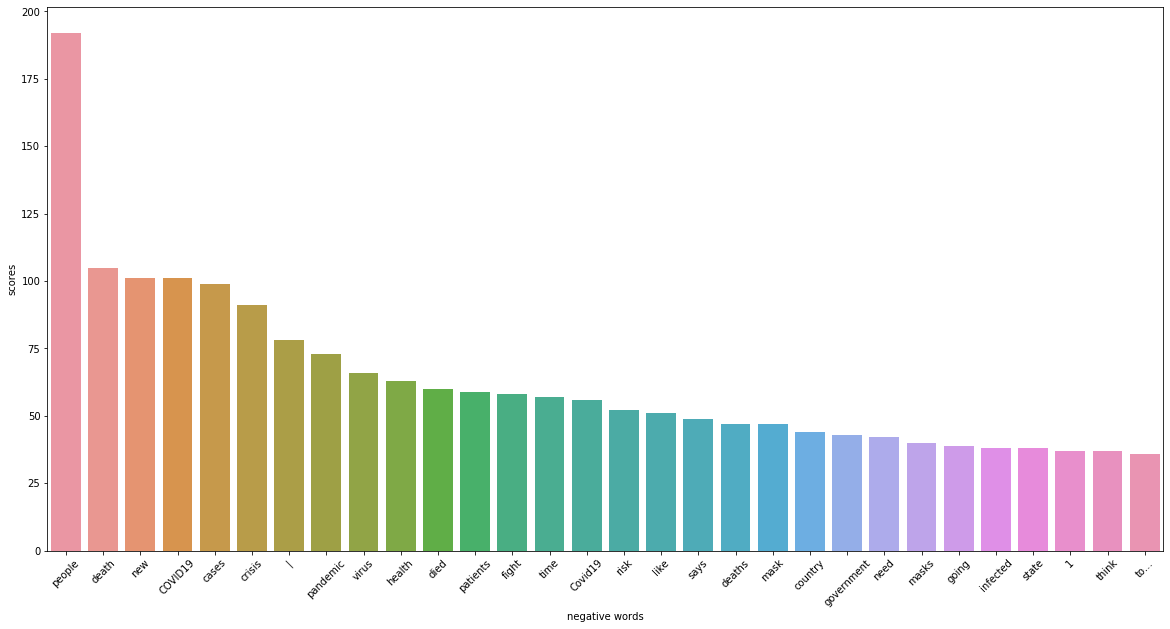

In [59]:
plt.figure(figsize=(20,10))
sns.barplot(x='words',y='scores',data=neg_df)
plt.xlabel('negative words')
plt.xticks(rotation=45)
plt.show()


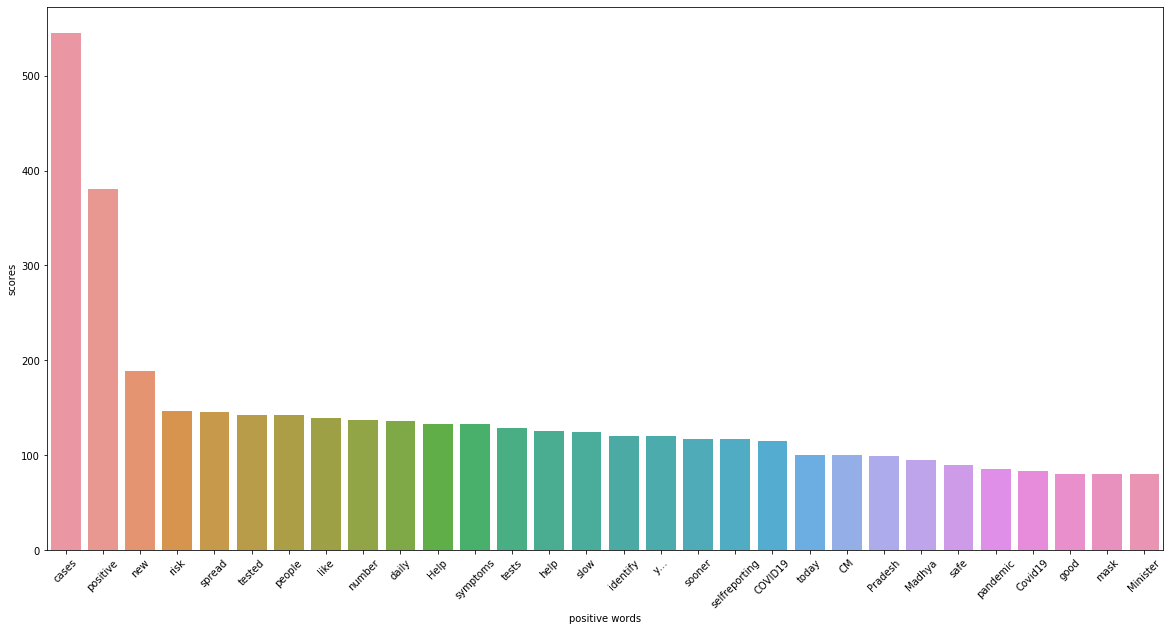

In [60]:
# Plot with seaborn
pos_df = pd.DataFrame(most_common_pos_words.items(),columns=['words','scores'])
plt.figure(figsize=(20,10))
sns.barplot(x='words',y='scores',data=pos_df)
plt.xlabel('positive words')
plt.xticks(rotation=45)
plt.show()


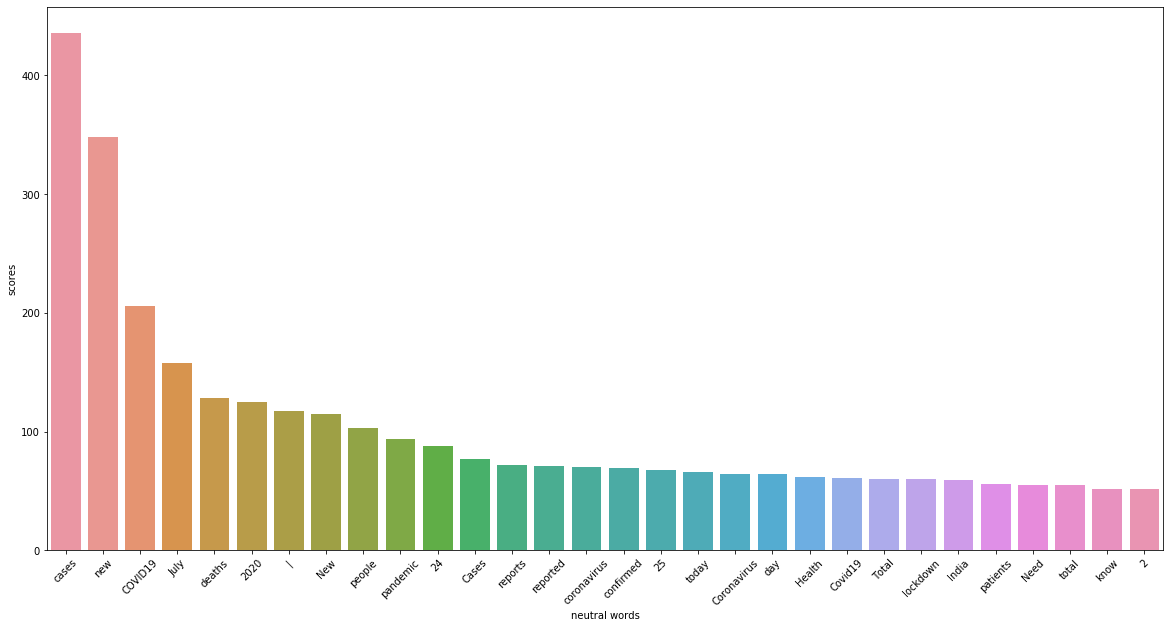

In [61]:
# Plot with seaborn
neut_df = pd.DataFrame(most_common_neut_words.items(),columns=['words','scores'])
plt.figure(figsize=(20,10))
sns.barplot(x='words',y='scores',data=neut_df)
plt.xlabel('neutral words')
plt.xticks(rotation=45)
plt.show()


In [62]:
### Word Cloud
from wordcloud import WordCloud

In [63]:
def plot_wordcloud(docx):
    plt.figure(figsize=(20,10))
    mywordcloud = WordCloud().generate(docx)
    plt.imshow(mywordcloud,interpolation='bilinear')
    plt.axis('off')
    plt.show()

In [64]:
pos_docx = ' '.join(pos_tokens)
neg_docx = ' '.join(neg_tokens)
neu_docx = ' '.join(neut_tokens)

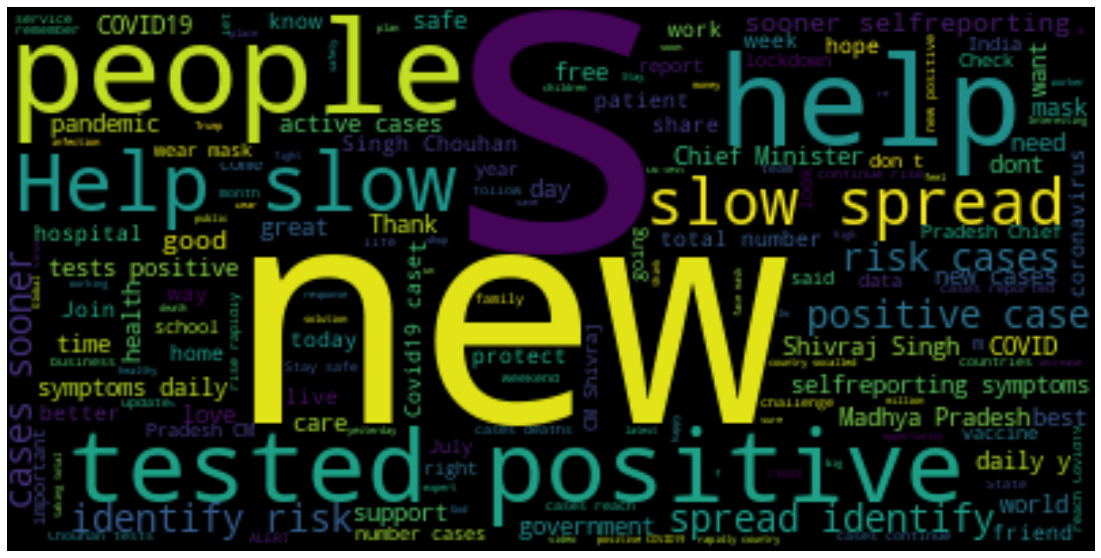

In [65]:
plot_wordcloud(pos_docx)

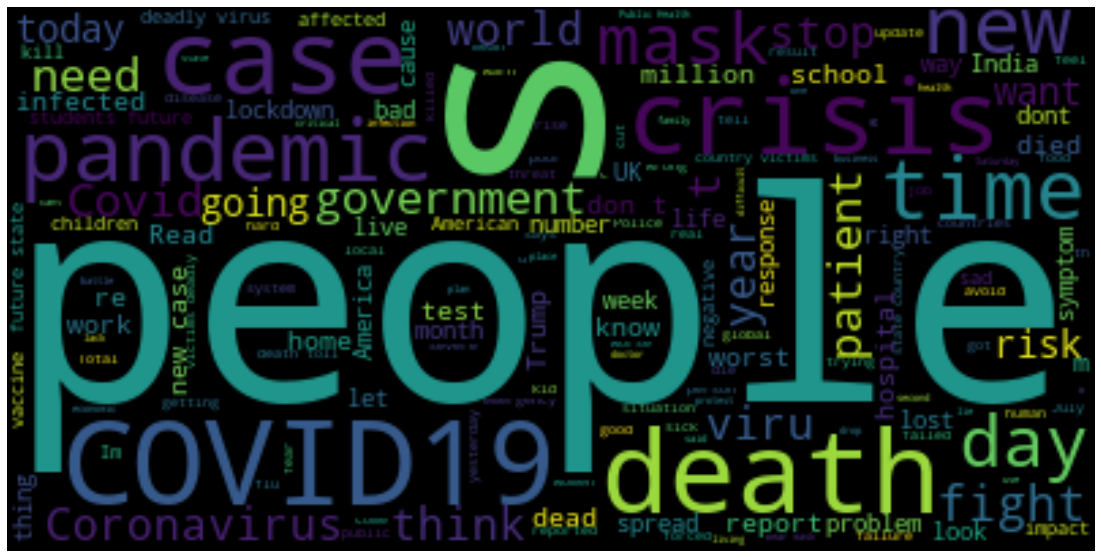

In [66]:
plot_wordcloud(neg_docx)

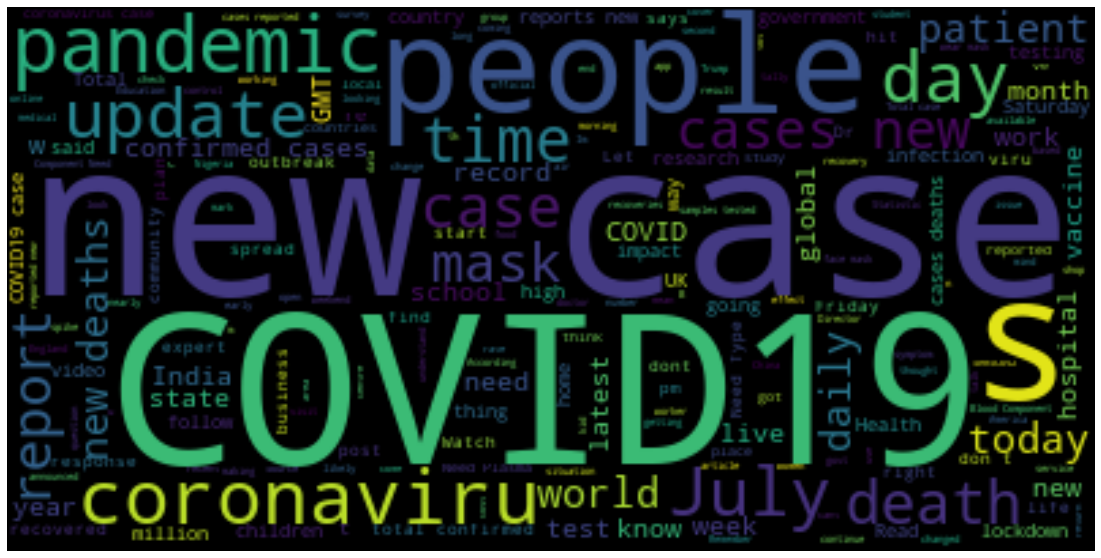

In [67]:
plot_wordcloud(neu_docx)